In [1]:
import numpy as np # recall that "np" etc. -- are abbreviated names we gave to these packages for notational convenience
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import os
from os.path import curdir

csv_path = os.path.join(curdir,'6722-credit-card-default-data.csv')

df = pd.read_csv(csv_path)

In [2]:
#feature engineering
df['COUNT_PAY_MINUS_2'] = (df[['PAY_1', 'PAY_2', 'PAY_3','PAY_4','PAY_5','PAY_6']] == -2).sum(axis=1)
df['COUNT_PAY_MINUS_1'] = (df[['PAY_1', 'PAY_2', 'PAY_3','PAY_4','PAY_5','PAY_6']] == -1).sum(axis=1)
df['COUNT_PAY_0'] = (df[['PAY_1', 'PAY_2', 'PAY_3','PAY_4','PAY_5','PAY_6']] == 0).sum(axis=1)
df['COUNT_PAY_1'] = (df[['PAY_1', 'PAY_2', 'PAY_3','PAY_4','PAY_5','PAY_6']] == 1).sum(axis=1)
df['COUNT_PAY_2'] = (df[['PAY_1', 'PAY_2', 'PAY_3','PAY_4','PAY_5','PAY_6']] == 2).sum(axis=1)
df['COUNT_PAY_3'] = (df[['PAY_1', 'PAY_2', 'PAY_3','PAY_4','PAY_5','PAY_6']] == 3).sum(axis=1)
df['COUNT_PAY_4'] = (df[['PAY_1', 'PAY_2', 'PAY_3','PAY_4','PAY_5','PAY_6']] == 4).sum(axis=1)
df['COUNT_PAY_5'] = (df[['PAY_1', 'PAY_2', 'PAY_3','PAY_4','PAY_5','PAY_6']] == 5).sum(axis=1)
df['COUNT_PAY_6'] = (df[['PAY_1', 'PAY_2', 'PAY_3','PAY_4','PAY_5','PAY_6']] == 6).sum(axis=1)
df['COUNT_PAY_7'] = (df[['PAY_1', 'PAY_2', 'PAY_3','PAY_4','PAY_5','PAY_6']] == 7).sum(axis=1)
df['COUNT_PAY_8'] = (df[['PAY_1', 'PAY_2', 'PAY_3','PAY_4','PAY_5','PAY_6']] == 8).sum(axis=1)

#sum of bill amount and payments over 6 months
df['TTL_BILL'] = df['BILL_AMT1']+df['BILL_AMT2']+df['BILL_AMT3']+df['BILL_AMT4']+df['BILL_AMT5']+df['BILL_AMT6']
df['TTL_PYMT'] = df['PAY_AMT1']+df['PAY_AMT2']+df['PAY_AMT3']+df['PAY_AMT4']+df['PAY_AMT5']+df['PAY_AMT6']
df['TTL_PAY'] = df['PAY_1']+df['PAY_2']+df['PAY_3']+df['PAY_4']+df['PAY_5']+df['PAY_6']
df['RATIO']= df['TTL_PYMT']/df['TTL_BILL'].replace(0,0.0001)

df['LOG_PAY_AMT1'] = np.log(df['PAY_AMT1'].replace(0,0.0001))
df['LOG_PAY_AMT2'] = np.log(df['PAY_AMT2'].replace(0,0.0001))
df['LOG_PAY_AMT3'] = np.log(df['PAY_AMT3'].replace(0,0.0001))
df['LOG_PAY_AMT4'] = np.log(df['PAY_AMT4'].replace(0,0.0001))
df['LOG_PAY_AMT5'] = np.log(df['PAY_AMT5'].replace(0,0.0001))
df['LOG_PAY_AMT6'] = np.log(df['PAY_AMT6'].replace(0,0.0001))

df['LOG_LIMIT_BAL'] = np.log(df['LIMIT_BAL'].replace(0,0.0001))
df['LOG_TTL_PYMT'] = np.log(df['TTL_PYMT'].replace(0,0.0001))
df['LOG_TTL_BILL'] = np.log(df['TTL_BILL'].apply(lambda x: 0.0001 if x < 1 else x))

df['PAY_AMT_AVG'] = df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].mean(axis=1)
df['PAY_TREND'] = (df['PAY_AMT5']-df['PAY_AMT6'])+(df['PAY_AMT4']-df['PAY_AMT5'])+(df['PAY_AMT3']-df['PAY_AMT4'])+(df['PAY_AMT2']-df['PAY_AMT3'])+(df['PAY_AMT1']-df['PAY_AMT2'])

df['PAY_1_SQR'] = df['PAY_1']**2
df['PAY_2_SQR'] = df['PAY_2']**2
df['PAY_3_SQR'] = df['PAY_3']**2
df['PAY_4_SQR'] = df['PAY_4']**2
df['PAY_5_SQR'] = df['PAY_5']**2
df['PAY_6_SQR'] = df['PAY_6']**2


#credit utilization
df['CREDIT_UTILIZATION1'] = df['BILL_AMT1'].apply(lambda x: 0.0001 if x < 1 else x) / df['LIMIT_BAL']
df['CREDIT_UTILIZATION2'] = df['BILL_AMT2'].apply(lambda x: 0.0001 if x < 1 else x) / df['LIMIT_BAL'] 
df['CREDIT_UTILIZATION3'] = df['BILL_AMT3'].apply(lambda x: 0.0001 if x < 1 else x) / df['LIMIT_BAL'] 
df['CREDIT_UTILIZATION4'] = df['BILL_AMT4'].apply(lambda x: 0.0001 if x < 1 else x) / df['LIMIT_BAL'] 
df['CREDIT_UTILIZATION5'] = df['BILL_AMT5'].apply(lambda x: 0.0001 if x < 1 else x) / df['LIMIT_BAL'] 
df['CREDIT_UTILIZATION6'] = df['BILL_AMT6'].apply(lambda x: 0.0001 if x < 1 else x) / df['LIMIT_BAL'] 

#lagged percentage of bill paid each month
df['BILL_PCT_PAID2'] = df['PAY_AMT1'] / df['BILL_AMT2'].replace(0,0.0001)
df['BILL_PCT_PAID3'] = df['PAY_AMT2'] / df['BILL_AMT3'].replace(0,0.0001)
df['BILL_PCT_PAID4'] = df['PAY_AMT3'] / df['BILL_AMT4'].replace(0,0.0001)
df['BILL_PCT_PAID5'] = df['PAY_AMT4'] / df['BILL_AMT5'].replace(0,0.0001)
df['BILL_PCT_PAID6'] = df['PAY_AMT5'] / df['BILL_AMT6'].replace(0,0.0001)


df['NEG_BILL_AMT1'] = df['BILL_AMT1'].apply(lambda x: 1 if x < 0 else 0)
df['NEG_BILL_AMT2'] = df['BILL_AMT2'].apply(lambda x: 1 if x < 0 else 0)
df['NEG_BILL_AMT3'] = df['BILL_AMT3'].apply(lambda x: 1 if x < 0 else 0)
df['NEG_BILL_AMT4'] = df['BILL_AMT4'].apply(lambda x: 1 if x < 0 else 0)
df['NEG_BILL_AMT5'] = df['BILL_AMT5'].apply(lambda x: 1 if x < 0 else 0)
df['NEG_BILL_AMT6'] = df['BILL_AMT6'].apply(lambda x: 1 if x < 0 else 0)

#payment variance
payment_columns = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
# Calculate the Payment Variance for each row
df['PMT_VAR'] = df[payment_columns].apply(lambda row: np.var(row), axis=1).replace(0,0.0001)

payment_columns = ['BILL_AMT1', 'BILL_AMT1', 'BILL_AMT1', 'BILL_AMT1', 'BILL_AMT1', 'BILL_AMT1']
# Calculate the Payment Variance for each row
df['PMT_VAR2'] = df[payment_columns].apply(lambda row: np.var(row), axis=1).replace(0,0.0001)

In [3]:
# "Cleaning" the data -- part 1: converting data types that should be categorican into "category"

df['SEX'] = df['SEX'].astype('category')
df['EDUCATION'] = df['EDUCATION'].astype('category')
df['MARRIAGE'] = df['MARRIAGE'].astype('category')
df['PAY_1'] = df['PAY_1'].astype('category')
df['PAY_2'] = df['PAY_2'].astype('category')
df['PAY_3'] = df['PAY_3'].astype('category')
df['PAY_4'] = df['PAY_4'].astype('category')
df['PAY_5'] = df['PAY_5'].astype('category')
df['PAY_6'] = df['PAY_6'].astype('category')


df.info() # let check the result

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 76 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   24000 non-null  int64   
 1   LIMIT_BAL            24000 non-null  float64 
 2   SEX                  24000 non-null  category
 3   EDUCATION            24000 non-null  category
 4   MARRIAGE             24000 non-null  category
 5   AGE                  24000 non-null  int64   
 6   PAY_1                24000 non-null  category
 7   PAY_2                24000 non-null  category
 8   PAY_3                24000 non-null  category
 9   PAY_4                24000 non-null  category
 10  PAY_5                24000 non-null  category
 11  PAY_6                24000 non-null  category
 12  BILL_AMT1            24000 non-null  float64 
 13  BILL_AMT2            24000 non-null  float64 
 14  BILL_AMT3            24000 non-null  float64 
 15  BILL_AMT4          

In [4]:
def CombineRareCategories(data, mincount):
    for col in data.columns:
        if (type(data[col][0]) == str):
            for index, row in pd.DataFrame(data[col].value_counts()).iterrows():
                if ( row[0] < mincount):
                    df[col].replace(index, 'Other_' + col, inplace = True)
                else:
                    None

# lets apply this functino to our data with mincount=10
CombineRareCategories(df, 10)

df[0:10] #lets check the result

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_PCT_PAID5,BILL_PCT_PAID6,NEG_BILL_AMT1,NEG_BILL_AMT2,NEG_BILL_AMT3,NEG_BILL_AMT4,NEG_BILL_AMT5,NEG_BILL_AMT6,PMT_VAR,PMT_VAR2
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.000000,0.000000,0,0,0,0,0,0,6.593347e+04,0.0001
1,2,90000.0,2,2,2,34,0,0,0,0,...,0.066899,0.064313,0,0,0,0,0,0,2.053601e+06,0.0001
2,3,50000.0,2,2,1,37,0,0,0,0,...,0.037985,0.036180,0,0,0,0,0,0,1.904497e+05,0.0001
3,4,50000.0,1,2,1,57,-1,0,-1,0,...,0.470072,0.036015,0,0,0,0,0,0,1.583835e+08,0.0001
4,5,50000.0,1,1,2,37,0,0,0,0,...,0.050971,0.049940,0,0,0,0,0,0,4.247572e+05,0.0001
5,6,100000.0,2,2,2,23,0,-1,-1,0,...,-3.654088,2.975309,0,0,0,0,1,0,3.735469e+05,0.0001
6,7,140000.0,2,3,1,28,0,0,2,0,...,0.084796,0.268889,0,0,0,0,0,0,1.108391e+06,0.0001
7,8,20000.0,1,3,2,35,-2,-2,-2,-2,...,1.000000,0.080650,0,0,0,0,0,0,2.286158e+07,0.0001
8,9,200000.0,2,3,2,34,0,0,2,0,...,0.164114,1.001876,0,0,0,0,0,0,2.067692e+06,0.0001
9,10,260000.0,2,1,2,51,-1,-1,-1,-1,...,1.000628,0.000000,0,0,0,0,0,0,7.113443e+07,0.0001


In [5]:
df = pd.get_dummies(df, columns = df.select_dtypes(exclude=['int64','float64']).columns, drop_first = True)

pd.options.display.max_columns = None 
pd.options.display.max_columns = None 


df.head()  

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,COUNT_PAY_MINUS_2,COUNT_PAY_MINUS_1,COUNT_PAY_0,COUNT_PAY_1,COUNT_PAY_2,COUNT_PAY_3,COUNT_PAY_4,COUNT_PAY_5,COUNT_PAY_6,COUNT_PAY_7,COUNT_PAY_8,TTL_BILL,TTL_PYMT,TTL_PAY,RATIO,LOG_PAY_AMT1,LOG_PAY_AMT2,LOG_PAY_AMT3,LOG_PAY_AMT4,LOG_PAY_AMT5,LOG_PAY_AMT6,LOG_LIMIT_BAL,LOG_TTL_PYMT,LOG_TTL_BILL,PAY_AMT_AVG,PAY_TREND,PAY_1_SQR,PAY_2_SQR,PAY_3_SQR,PAY_4_SQR,PAY_5_SQR,PAY_6_SQR,CREDIT_UTILIZATION1,CREDIT_UTILIZATION2,CREDIT_UTILIZATION3,CREDIT_UTILIZATION4,CREDIT_UTILIZATION5,CREDIT_UTILIZATION6,BILL_PCT_PAID2,BILL_PCT_PAID3,BILL_PCT_PAID4,BILL_PCT_PAID5,BILL_PCT_PAID6,NEG_BILL_AMT1,NEG_BILL_AMT2,NEG_BILL_AMT3,NEG_BILL_AMT4,NEG_BILL_AMT5,NEG_BILL_AMT6,PMT_VAR,PMT_VAR2,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_1_-1,PAY_1_0,PAY_1_1,PAY_1_2,PAY_1_3,PAY_1_4,PAY_1_5,PAY_1_6,PAY_1_7,PAY_1_8,PAY_2_-1,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_2_8,PAY_3_-1,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-1,PAY_4_0,PAY_4_1,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,1,20000.0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,2,2,0,0,2,0,0,0,0,0,0,7704.0,689.0,-2,0.089434,-9.210340,6.535241,-9.210340,-9.210340,-9.210340,-9.210340,9.903488,6.535241,8.949495,114.833333,0.0,4,4,1,1,4,4,0.195650,0.155100,0.034450,5.000000e-09,5.000000e-09,5.000000e-09,0.000000,1.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,6.593347e+04,0.0001,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,90000.0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,0,6,0,0,0,0,0,0,0,0,101653.0,11018.0,0,0.108388,7.325149,7.313220,6.907755,6.907755,6.907755,8.517193,11.407565,9.307286,11.529320,1836.333333,-3482.0,0,0,0,0,0,0,0.324878,0.155856,0.150656,1.592333e-01,1.660889e-01,1.727667e-01,0.108220,0.110628,0.069779,0.066899,0.064313,0,0,0,0,0,0,2.053601e+06,0.0001,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,3,50000.0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,0,6,0,0,0,0,0,0,0,0,231334.0,8388.0,0,0.036259,7.600902,7.610358,7.090077,7.003065,6.974479,6.907755,10.819778,9.034557,12.351618,1398.000000,1000.0,0,0,0,0,0,0,0.939800,0.964660,0.985820,5.662800e-01,5.791800e-01,5.909400e-01,0.041465,0.040961,0.042382,0.037985,0.036180,0,0,0,0,0,0,1.904497e+05,0.0001,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,4,50000.0,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0,2,4,0,0,0,0,0,0,0,0,109339.0,59049.0,-2,0.540054,7.600902,10.510014,9.210340,9.104980,6.535241,6.520621,10.819778,10.986123,11.602208,9841.500000,1321.0,1,0,1,0,0,0,0.172340,0.113400,0.716700,4.188000e-01,3.829200e-01,3.826200e-01,0.352734,1.023608,0.477555,0.470072,0.036015,0,0,0,0,0,0,1.583835e+08,0.0001,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,5,50000.0,37,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0,0,0,6,0,0,0,0,0,0,0,0,238114.0,7772.0,0,0.032640,7.824046,7.503841,6.487684,6.907755,6.907755,6.684612,10.819778,8.958283,12.380505,1295.333333,1700.0,0,0,0,0,0,0,1.288000,1.141380,1.152160,3.878800e-01,3.923800e-01,4.004800e-01,0.043807,0.031506,0.033876,0.050971,0.049940,0,0,0,0,0,0,4.247572e+05,0.0001,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0

In [6]:
y = df['DEFAULT']
X = df.drop(columns = ['DEFAULT','ID'])

class_threshold = 0.230769231

np.random.seed(77300)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, stratify=y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(19200, 133)
(4800, 133)
(19200,)
(4800,)


In [7]:
def plot_roc(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1, drop_intermediate = False)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.001, 1.001])
    plt.ylim([-0.001, 1.001])
    plt.xlabel('1-Specificity (False Negative Rate)')
    plt.ylabel('Sensitivity (True Positive Rate)')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

def plot_roc(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1, drop_intermediate = False)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.001, 1.001])
    plt.ylim([-0.001, 1.001])
    plt.xlabel('1-Specificity (False Negative Rate)')
    plt.ylabel('Sensitivity (True Positive Rate)')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

# Confusion Matrix returns in the format: cm[0,0], cm[0,1], cm[1,0], cm[1,1]: tn, fp, fn, tp

# Sensitivity
def custom_sensitivity_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tp/(tp+fn))

# Specificity
def custom_specificity_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tn/(tn+fp))

# Positive Predictive Value
def custom_ppv_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tp/(tp+fp))

# Negative Predictive Value
def custom_npv_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tn/(tn+fn))

# Accuracy
def custom_accuracy_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return ((tn+tp)/(tn+tp+fn+fp))

#simulate profit calculation normalized to 1000 applications
def custom_profit_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (((tn/(tn+fn+tp+fp))*1000)*1500) + (((fn/(tn+fn+tp+fp))*1000)*-5000)

In [8]:
# Define the gradient boosting machine model and call it classifier_GBM
classifier_GBM = GradientBoostingClassifier(learning_rate=0.15, n_estimators=150, random_state=77300)

# Train the model classifier_GBM on the training data
classifier_GBM.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.15, n_estimators=150,
                           random_state=77300)

Metrics of the Gradient Boosting Machine model: 

Confusion matrix: 
[[3021  718]
 [ 382  679]]
                                   Accuracy: 0.7708333333333334
                   SENSITIVITY (aka RECALL): 0.6399622997172478
                 SPECIFICITY (aka FALL-OUT): 0.8079700454667024
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.4860415175375805
                 NEGATIVE PREDICTIVE VALUE): 0.8877461063767265


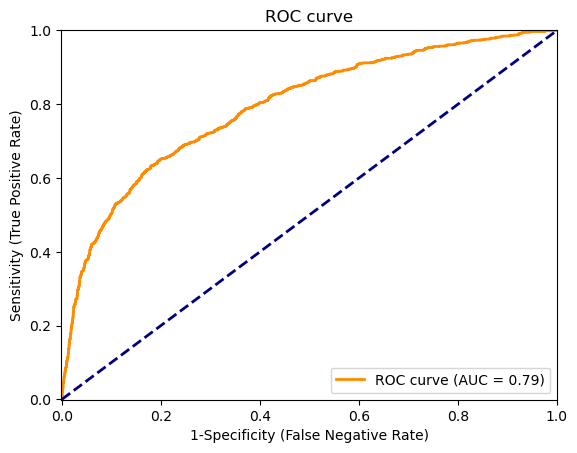

 AUC: 0.793385637140072
                           Projected Profit: $546,145.83


In [9]:
# Use the trained model to predict testing data
y_pred_prob = classifier_GBM.predict_proba(X_test)[:,1] # probabilities
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # classification

# Lets look at the model metrics

print('Metrics of the Gradient Boosting Machine model: \n')

cm = confusion_matrix(y_test, y_pred)
#cm = np.transpose(confusion_matrix(y_test, y_pred))
print("Confusion matrix: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred)))
print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))
print("                           Projected Profit: "   +'${:,.2f}'.format(custom_profit_score(y_test,y_pred)))

TTL_PAY                0.310393
COUNT_PAY_2            0.176860
PAY_1_SQR              0.136398
PAY_1_2                0.027906
BILL_AMT1              0.026243
LOG_TTL_BILL           0.021837
RATIO                  0.019501
TTL_PYMT               0.018694
CREDIT_UTILIZATION2    0.017907
CREDIT_UTILIZATION1    0.017535
BILL_PCT_PAID6         0.010291
LOG_LIMIT_BAL          0.010118
TTL_BILL               0.009811
LOG_PAY_AMT3           0.008943
LIMIT_BAL              0.008640
dtype: float64


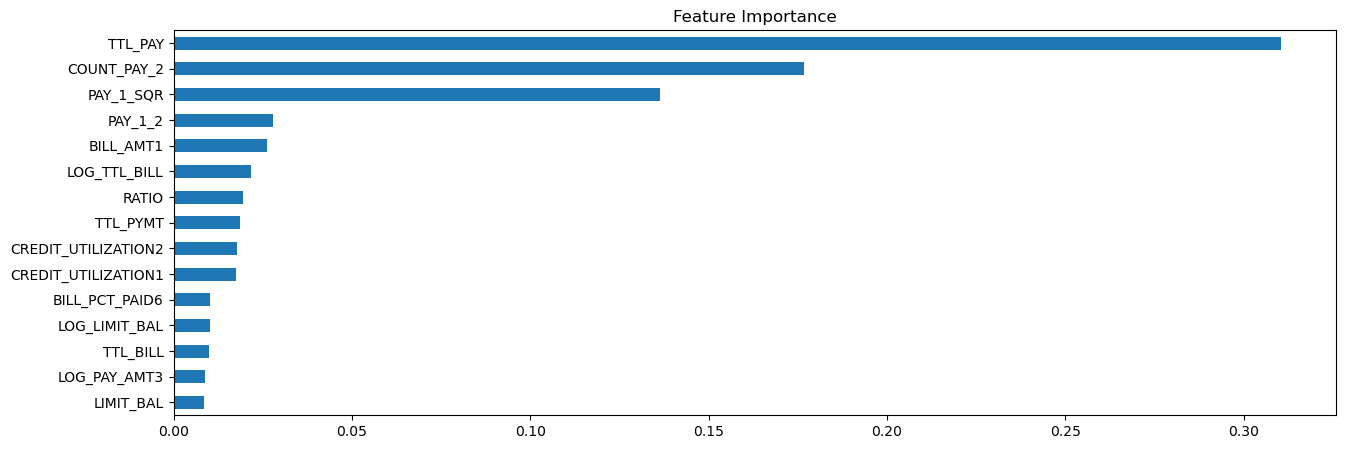

In [10]:
importances = classifier_GBM.feature_importances_

# plot them
plt.figure(figsize=(15,5))
plt.title('Feature Importance')
plt.xlabel('Decrease in Gini (recal, Gini = 2*AUC-1)')
feature_importances = pd.Series(classifier_GBM.feature_importances_, index=X_train.columns)
feature_importances.nlargest(15).sort_values().plot(kind='barh', align='center')

print(feature_importances.nlargest(15))

In [11]:
pred_proba_df = pd.DataFrame(classifier_GBM.predict_proba(X_test))
threshold_list = [0.05,0.1,0.15,0.2,0.2210, 0.230769231, 0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
for i in threshold_list:
    print (f"\n******** For Threshold = {i} ******")
    y_pred = pd.DataFrame(pred_proba_df[1]).applymap(lambda x: 1 if x>i else 0)
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion matrix: \n" + str(cm))

    print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred)))
    print("                   SENSITIVITY (aka RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
    print("                 SPECIFICITY (aka FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
    print(" POSITIVE PREDICTIVE VALUE, (aka PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
    print("                 NEGATIVE PREDICTIVE VALUE): " + str(custom_npv_score(y_test, y_pred)))
    print("                         Projected Profit: "   +'${:,.2f}'.format(custom_profit_score(y_test,y_pred)))


******** For Threshold = 0.05 ******
Confusion matrix: 
[[ 290 3449]
 [  11 1050]]
                                   Accuracy: 0.2791666666666667
                   SENSITIVITY (aka RECALL): 0.9896324222431668
                 SPECIFICITY (aka FALL-OUT): 0.07756084514576089
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.23338519671038008
                 NEGATIVE PREDICTIVE VALUE): 0.9634551495016611
                         Projected Profit: $79,166.67

******** For Threshold = 0.1 ******
Confusion matrix: 
[[1481 2258]
 [  95  966]]
                                   Accuracy: 0.5097916666666666
                   SENSITIVITY (aka RECALL): 0.9104618284637135
                 SPECIFICITY (aka FALL-OUT): 0.3960952126236962
 POSITIVE PREDICTIVE VALUE, (aka PRECISION): 0.29962779156327546
                 NEGATIVE PREDICTIVE VALUE): 0.9397208121827412
                         Projected Profit: $363,854.17

******** For Threshold = 0.15 ******
Confusion matrix: 
[[2351 1388]
 [ 225  836

# Testing on pilot dataset

In [12]:
csv_path1 = os.path.join(curdir,'6722-pilot-customers.csv')
pilot_df = pd.read_csv(csv_path1)

In [14]:
#feature engineering
pilot_df['COUNT_PAY_MINUS_2'] = (pilot_df[['PAY_1', 'PAY_2', 'PAY_3','PAY_4','PAY_5','PAY_6']] == -2).sum(axis=1)
pilot_df['COUNT_PAY_MINUS_1'] = (pilot_df[['PAY_1', 'PAY_2', 'PAY_3','PAY_4','PAY_5','PAY_6']] == -1).sum(axis=1)
pilot_df['COUNT_PAY_0'] = (pilot_df[['PAY_1', 'PAY_2', 'PAY_3','PAY_4','PAY_5','PAY_6']] == 0).sum(axis=1)
pilot_df['COUNT_PAY_1'] = (pilot_df[['PAY_1', 'PAY_2', 'PAY_3','PAY_4','PAY_5','PAY_6']] == 1).sum(axis=1)
pilot_df['COUNT_PAY_2'] = (pilot_df[['PAY_1', 'PAY_2', 'PAY_3','PAY_4','PAY_5','PAY_6']] == 2).sum(axis=1)
pilot_df['COUNT_PAY_3'] = (pilot_df[['PAY_1', 'PAY_2', 'PAY_3','PAY_4','PAY_5','PAY_6']] == 3).sum(axis=1)
pilot_df['COUNT_PAY_4'] = (pilot_df[['PAY_1', 'PAY_2', 'PAY_3','PAY_4','PAY_5','PAY_6']] == 4).sum(axis=1)
pilot_df['COUNT_PAY_5'] = (pilot_df[['PAY_1', 'PAY_2', 'PAY_3','PAY_4','PAY_5','PAY_6']] == 5).sum(axis=1)
pilot_df['COUNT_PAY_6'] = (pilot_df[['PAY_1', 'PAY_2', 'PAY_3','PAY_4','PAY_5','PAY_6']] == 6).sum(axis=1)
pilot_df['COUNT_PAY_7'] = (pilot_df[['PAY_1', 'PAY_2', 'PAY_3','PAY_4','PAY_5','PAY_6']] == 7).sum(axis=1)
pilot_df['COUNT_PAY_8'] = (pilot_df[['PAY_1', 'PAY_2', 'PAY_3','PAY_4','PAY_5','PAY_6']] == 8).sum(axis=1)

#sum of bill amount and payments over 6 months
pilot_df['TTL_BILL'] = pilot_df['BILL_AMT1']+pilot_df['BILL_AMT2']+pilot_df['BILL_AMT3']+pilot_df['BILL_AMT4']+pilot_df['BILL_AMT5']+pilot_df['BILL_AMT6']
pilot_df['TTL_PYMT'] = pilot_df['PAY_AMT1']+pilot_df['PAY_AMT2']+pilot_df['PAY_AMT3']+pilot_df['PAY_AMT4']+pilot_df['PAY_AMT5']+pilot_df['PAY_AMT6']
pilot_df['TTL_PAY'] = pilot_df['PAY_1']+pilot_df['PAY_2']+pilot_df['PAY_3']+pilot_df['PAY_4']+pilot_df['PAY_5']+pilot_df['PAY_6']
pilot_df['RATIO']= pilot_df['TTL_PYMT']/pilot_df['TTL_BILL'].replace(0,0.0001)

pilot_df['LOG_PAY_AMT1'] = np.log(pilot_df['PAY_AMT1'].replace(0,0.0001))
pilot_df['LOG_PAY_AMT2'] = np.log(pilot_df['PAY_AMT2'].replace(0,0.0001))
pilot_df['LOG_PAY_AMT3'] = np.log(pilot_df['PAY_AMT3'].replace(0,0.0001))
pilot_df['LOG_PAY_AMT4'] = np.log(pilot_df['PAY_AMT4'].replace(0,0.0001))
pilot_df['LOG_PAY_AMT5'] = np.log(pilot_df['PAY_AMT5'].replace(0,0.0001))
pilot_df['LOG_PAY_AMT6'] = np.log(pilot_df['PAY_AMT6'].replace(0,0.0001))

pilot_df['LOG_LIMIT_BAL'] = np.log(pilot_df['LIMIT_BAL'].replace(0,0.0001))
pilot_df['LOG_TTL_PYMT'] = np.log(pilot_df['TTL_PYMT'].replace(0,0.0001))
pilot_df['LOG_TTL_BILL'] = np.log(pilot_df['TTL_BILL'].apply(lambda x: 0.0001 if x < 1 else x))

pilot_df['PAY_AMT_AVG'] = pilot_df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].mean(axis=1)
pilot_df['PAY_TREND'] = (pilot_df['PAY_AMT5']-pilot_df['PAY_AMT6'])+(pilot_df['PAY_AMT4']-pilot_df['PAY_AMT5'])+(pilot_df['PAY_AMT3']-pilot_df['PAY_AMT4'])+(pilot_df['PAY_AMT2']-pilot_df['PAY_AMT3'])+(pilot_df['PAY_AMT1']-pilot_df['PAY_AMT2'])

pilot_df['PAY_1_SQR'] = pilot_df['PAY_1']**2
pilot_df['PAY_2_SQR'] = pilot_df['PAY_2']**2
pilot_df['PAY_3_SQR'] = pilot_df['PAY_3']**2
pilot_df['PAY_4_SQR'] = pilot_df['PAY_4']**2
pilot_df['PAY_5_SQR'] = pilot_df['PAY_5']**2
pilot_df['PAY_6_SQR'] = pilot_df['PAY_6']**2


#credit utilization
pilot_df['CREDIT_UTILIZATION1'] = pilot_df['BILL_AMT1'].apply(lambda x: 0.0001 if x < 1 else x) / pilot_df['LIMIT_BAL']
pilot_df['CREDIT_UTILIZATION2'] = pilot_df['BILL_AMT2'].apply(lambda x: 0.0001 if x < 1 else x) / pilot_df['LIMIT_BAL'] 
pilot_df['CREDIT_UTILIZATION3'] = pilot_df['BILL_AMT3'].apply(lambda x: 0.0001 if x < 1 else x) / pilot_df['LIMIT_BAL'] 
pilot_df['CREDIT_UTILIZATION4'] = pilot_df['BILL_AMT4'].apply(lambda x: 0.0001 if x < 1 else x) / pilot_df['LIMIT_BAL'] 
pilot_df['CREDIT_UTILIZATION5'] = pilot_df['BILL_AMT5'].apply(lambda x: 0.0001 if x < 1 else x) / pilot_df['LIMIT_BAL'] 
pilot_df['CREDIT_UTILIZATION6'] = pilot_df['BILL_AMT6'].apply(lambda x: 0.0001 if x < 1 else x) / pilot_df['LIMIT_BAL'] 

#lagged percentage of bill paid each month
pilot_df['BILL_PCT_PAID2'] = pilot_df['PAY_AMT1'] / pilot_df['BILL_AMT2'].replace(0,0.0001)
pilot_df['BILL_PCT_PAID3'] = pilot_df['PAY_AMT2'] / pilot_df['BILL_AMT3'].replace(0,0.0001)
pilot_df['BILL_PCT_PAID4'] = pilot_df['PAY_AMT3'] / pilot_df['BILL_AMT4'].replace(0,0.0001)
pilot_df['BILL_PCT_PAID5'] = pilot_df['PAY_AMT4'] / pilot_df['BILL_AMT5'].replace(0,0.0001)
pilot_df['BILL_PCT_PAID6'] = pilot_df['PAY_AMT5'] / pilot_df['BILL_AMT6'].replace(0,0.0001)


pilot_df['NEG_BILL_AMT1'] = pilot_df['BILL_AMT1'].apply(lambda x: 1 if x < 0 else 0)
pilot_df['NEG_BILL_AMT2'] = pilot_df['BILL_AMT2'].apply(lambda x: 1 if x < 0 else 0)
pilot_df['NEG_BILL_AMT3'] = pilot_df['BILL_AMT3'].apply(lambda x: 1 if x < 0 else 0)
pilot_df['NEG_BILL_AMT4'] = pilot_df['BILL_AMT4'].apply(lambda x: 1 if x < 0 else 0)
pilot_df['NEG_BILL_AMT5'] = pilot_df['BILL_AMT5'].apply(lambda x: 1 if x < 0 else 0)
pilot_df['NEG_BILL_AMT6'] = pilot_df['BILL_AMT6'].apply(lambda x: 1 if x < 0 else 0)

#payment variance
payment_columns = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
# Calculate the Payment Variance for each row
pilot_df['PMT_VAR'] = pilot_df[payment_columns].apply(lambda row: np.var(row), axis=1).replace(0,0.0001)

payment_columns = ['BILL_AMT1', 'BILL_AMT1', 'BILL_AMT1', 'BILL_AMT1', 'BILL_AMT1', 'BILL_AMT1']
# Calculate the Payment Variance for each row
pilot_df['PMT_VAR2'] = pilot_df[payment_columns].apply(lambda row: np.var(row), axis=1).replace(0,0.0001)

In [15]:
pilot_df['SEX'] = pilot_df['SEX'].astype('category')
pilot_df['EDUCATION'] = pilot_df['EDUCATION'].astype('category')
pilot_df['MARRIAGE'] = pilot_df['MARRIAGE'].astype('category')
pilot_df['PAY_1'] = pilot_df['PAY_1'].astype('category')
pilot_df['PAY_2'] = pilot_df['PAY_2'].astype('category')
pilot_df['PAY_3'] = pilot_df['PAY_3'].astype('category')
pilot_df['PAY_4'] = pilot_df['PAY_4'].astype('category')
pilot_df['PAY_5'] = pilot_df['PAY_5'].astype('category')
pilot_df['PAY_6'] = pilot_df['PAY_6'].astype('category')



pilot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 75 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   1000 non-null   int64   
 1   LIMIT_BAL            1000 non-null   float64 
 2   SEX                  1000 non-null   category
 3   EDUCATION            1000 non-null   category
 4   MARRIAGE             1000 non-null   category
 5   AGE                  1000 non-null   int64   
 6   PAY_1                1000 non-null   category
 7   PAY_2                1000 non-null   category
 8   PAY_3                1000 non-null   category
 9   PAY_4                1000 non-null   category
 10  PAY_5                1000 non-null   category
 11  PAY_6                1000 non-null   category
 12  BILL_AMT1            1000 non-null   int64   
 13  BILL_AMT2            1000 non-null   int64   
 14  BILL_AMT3            1000 non-null   int64   
 15  BILL_AMT4            1

In [16]:
# lets apply this functino to our data with mincount=10
CombineRareCategories(pilot_df, 10)

pilot_df[0:10]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,COUNT_PAY_MINUS_2,COUNT_PAY_MINUS_1,COUNT_PAY_0,COUNT_PAY_1,COUNT_PAY_2,COUNT_PAY_3,COUNT_PAY_4,COUNT_PAY_5,COUNT_PAY_6,COUNT_PAY_7,COUNT_PAY_8,TTL_BILL,TTL_PYMT,TTL_PAY,RATIO,LOG_PAY_AMT1,LOG_PAY_AMT2,LOG_PAY_AMT3,LOG_PAY_AMT4,LOG_PAY_AMT5,LOG_PAY_AMT6,LOG_LIMIT_BAL,LOG_TTL_PYMT,LOG_TTL_BILL,PAY_AMT_AVG,PAY_TREND,PAY_1_SQR,PAY_2_SQR,PAY_3_SQR,PAY_4_SQR,PAY_5_SQR,PAY_6_SQR,CREDIT_UTILIZATION1,CREDIT_UTILIZATION2,CREDIT_UTILIZATION3,CREDIT_UTILIZATION4,CREDIT_UTILIZATION5,CREDIT_UTILIZATION6,BILL_PCT_PAID2,BILL_PCT_PAID3,BILL_PCT_PAID4,BILL_PCT_PAID5,BILL_PCT_PAID6,NEG_BILL_AMT1,NEG_BILL_AMT2,NEG_BILL_AMT3,NEG_BILL_AMT4,NEG_BILL_AMT5,NEG_BILL_AMT6,PMT_VAR,PMT_VAR2
0,24001,500000.0,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000.0,40000.0,38000.0,20239,13750.0,13770,0,0,6,0,0,0,0,0,0,0,0,2724595,180759.0,0,0.066343,10.915088,10.596635,10.545341,9.915367,9.528794,9.530248,13.122363,12.104920,14.817830,30126.500000,41230.0,0,0,0,0,0,0,7.359300e-01,8.240460e-01,8.900140e-01,1.085306e+00,9.660060e-01,9.478880e-01,0.133488,0.089886,0.070026,0.041902,0.029012,0,0,0,0,0,0,2.352761e+08,0.0001
1,24002,210000.0,1,1,2,29,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0,6,0,0,0,0,0,0,0,0,0,0,0,0.0,-12,0.000000,-9.210340,-9.210340,-9.210340,-9.210340,-9.210340,-9.210340,12.254863,-9.210340,-9.210340,0.000000,0.0,4,4,4,4,4,4,4.761905e-10,4.761905e-10,4.761905e-10,4.761905e-10,4.761905e-10,4.761905e-10,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,1.000000e-04,0.0001
2,24003,150000.0,1,1,2,27,0,0,0,0,0,0,86009,86108,89006,89775,87725,40788,4031.0,10006.0,3266.0,4040,1698.0,800,0,0,6,0,0,0,0,0,0,0,0,479411,23841.0,0,0.049730,8.301770,9.210940,8.091321,8.304000,7.437206,6.684612,11.918391,10.079162,13.080314,3973.500000,3231.0,0,0,0,0,0,0,5.733933e-01,5.740533e-01,5.933733e-01,5.985000e-01,5.848333e-01,2.719200e-01,0.046813,0.112419,0.036380,0.046053,0.041630,0,0,0,0,0,0,8.691391e+06,0.0001
3,24004,20000.0,1,2,1,38,0,0,0,0,0,-1,17973,19367,19559,18240,17928,150,1699.0,1460.0,626.0,1750,150.0,0,0,1,5,0,0,0,0,0,0,0,0,93217,5685.0,-1,0.060987,7.437795,7.286192,6.439350,7.467371,5.010635,-9.210340,9.903488,8.645586,11.442685,947.500000,1699.0,0,0,0,0,0,1,8.986500e-01,9.683500e-01,9.779500e-01,9.120000e-01,8.964000e-01,7.500000e-03,0.087727,0.074646,0.034320,0.097613,1.000000,0,0,0,0,0,0,5.180899e+05,0.0001
4,24005,400000.0,1,2,1,34,-1,-1,-1,-1,-1,-1,19660,9666,11867,7839,14837,7959,9677.0,11867.0,7839.0,14837,7959.0,5712,0,6,0,0,0,0,0,0,0,0,0,71828,57891.0,-6,0.805967,9.177507,9.381517,8.966867,9.604879,8.982059,8.650325,12.899220,10.966317,11.182030,9648.500000,3965.0,1,1,1,1,1,1,4.915000e-02,2.416500e-02,2.966750e-02,1.959750e-02,3.709250e-02,1.989750e-02,1.001138,1.000000,1.000000,1.000000,1.000000,0,0,0,0,0,0,8.911303e+06,0.0001
5,24006,210000.0,2,1,1,38,1,-2,-1,0,-1,-1,0,0,250,123,789,1222,0.0,250.0,0.0,789,1222.0,9616,1,3,1,1,0,0,0,0,0,0,0,2384,11877.0,-4,4.981963,-9.210340,5.521461,-9.210340,6.670766,7.108244,9.171184,12.254863,9.382359,7.776535,1979.500000,-9616.0,1,4,1,0,1,1,4.761905e-10,4.761905e-10,1.190476e-03,5.857143e-04,3.757143e-03,5.819048e-03,0.000000,1.000000,0.000000,1.000000,1.000000,0,0,0,0,0,0,1.185587e+07,0.0001
6,24007,30000.0,1,3,1,42,-1,-1,-1,-1,-1,2,390,390,390,240,1320,780,390.0,390.0,240.0,1470,0.0,0,0,5,0,0,1,0,0,0,0,0,0,3510,2490.0,-3,0.709402,5.966147,5.966147,5.480639,7.293018,-9.210340,-9.210340,10.308953,7.820038,8.163371,415.000000,390.0,1,1,1,1,1,4,1.300000e-02,1.300000e-02,1.300000e-02,8.000000e-03,4.400000e-02,2.600000e-02,1.000000,1.000000,1.000000,1.113636,0.000000,0,0,0,0,0,0,2.482250e+05,0.0001
7,24008,150000.0,2,2,2,27,0,0,0,0,0,0,127402,110050,51547,44384,36900,29497,4500.0,1745.0,1566.0,1208,1077.0,2529,0,0,6,0,0,0,0,0,0,0,0,399780,12625.0,0,0.031580,8.411833,7.464510,7.356280,7.0967

In [17]:
pilot_df = pd.get_dummies(pilot_df, columns = pilot_df.select_dtypes(exclude=['int64','float64']).columns, drop_first = True)

pd.options.display.max_columns = None 
pd.options.display.max_columns = None 


pilot_df.head() 

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,COUNT_PAY_MINUS_2,COUNT_PAY_MINUS_1,COUNT_PAY_0,COUNT_PAY_1,COUNT_PAY_2,COUNT_PAY_3,COUNT_PAY_4,COUNT_PAY_5,COUNT_PAY_6,COUNT_PAY_7,COUNT_PAY_8,TTL_BILL,TTL_PYMT,TTL_PAY,RATIO,LOG_PAY_AMT1,LOG_PAY_AMT2,LOG_PAY_AMT3,LOG_PAY_AMT4,LOG_PAY_AMT5,LOG_PAY_AMT6,LOG_LIMIT_BAL,LOG_TTL_PYMT,LOG_TTL_BILL,PAY_AMT_AVG,PAY_TREND,PAY_1_SQR,PAY_2_SQR,PAY_3_SQR,PAY_4_SQR,PAY_5_SQR,PAY_6_SQR,CREDIT_UTILIZATION1,CREDIT_UTILIZATION2,CREDIT_UTILIZATION3,CREDIT_UTILIZATION4,CREDIT_UTILIZATION5,CREDIT_UTILIZATION6,BILL_PCT_PAID2,BILL_PCT_PAID3,BILL_PCT_PAID4,BILL_PCT_PAID5,BILL_PCT_PAID6,NEG_BILL_AMT1,NEG_BILL_AMT2,NEG_BILL_AMT3,NEG_BILL_AMT4,NEG_BILL_AMT5,NEG_BILL_AMT6,PMT_VAR,PMT_VAR2,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_1_-1,PAY_1_0,PAY_1_1,PAY_1_2,PAY_1_3,PAY_1_4,PAY_1_5,PAY_1_7,PAY_1_8,PAY_2_-1,PAY_2_0,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_6,PAY_2_7,PAY_3_-1,PAY_3_0,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_4_-1,PAY_4_0,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_7,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_7,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_7
0,24001,500000.0,29,367965,412023,445007,542653,483003,473944,55000.0,40000.0,38000.0,20239,13750.0,13770,0,0,6,0,0,0,0,0,0,0,0,2724595,180759.0,0,0.066343,10.915088,10.596635,10.545341,9.915367,9.528794,9.530248,13.122363,12.104920,14.817830,30126.5,41230.0,0,0,0,0,0,0,7.359300e-01,8.240460e-01,8.900140e-01,1.085306e+00,9.660060e-01,9.478880e-01,0.133488,0.089886,0.070026,0.041902,0.029012,0,0,0,0,0,0,2.352761e+08,0.0001,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,24002,210000.0,29,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0,6,0,0,0,0,0,0,0,0,0,0,0,0.0,-12,0.000000,-9.210340,-9.210340,-9.210340,-9.210340,-9.210340,-9.210340,12.254863,-9.210340,-9.210340,0.0,0.0,4,4,4,4,4,4,4.761905e-10,4.761905e-10,4.761905e-10,4.761905e-10,4.761905e-10,4.761905e-10,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,1.000000e-04,0.0001,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,24003,150000.0,27,86009,86108,89006,89775,87725,40788,4031.0,10006.0,3266.0,4040,1698.0,800,0,0,6,0,0,0,0,0,0,0,0,479411,23841.0,0,0.049730,8.301770,9.210940,8.091321,8.304000,7.437206,6.684612,11.918391,10.079162,13.080314,3973.5,3231.0,0,0,0,0,0,0,5.733933e-01,5.740533e-01,5.933733e-01,5.985000e-01,5.848333e-01,2.719200e-01,0.046813,0.112419,0.036380,0.046053,0.041630,0,0,0,0,0,0,8.691391e+06,0.0001,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,24004,20000.0,38,17973,19367,19559,18240,17928,150,1699.0,1460.0,626.0,1750,150.0,0,0,1,5,0,0,0,0,0,0,0,0,93217,5685.0,-1,0.060987,7.437795,7.286192,6.439350,7.467371,5.010635,-9.210340,9.903488,8.645586,11.442685,947.5,1699.0,0,0,0,0,0,1,8.986500e-01,9.683500e-01,9.779500e-01,9.120000e-01,8.964000e-01,7.500000e-03,0.087727,0.074646,0.034320,0.097613,1.000000,0,0,0,0,0,0,5.180899e+05,0.0001,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,24005,400000.0,34,19660,9666,11867,7839,14837,7959,9677.0,11867.0,7839.0,14837,7959.0,5712,0,6,0,0,0,0,0,0,0,0,0,71828,57891.0,-6,0.805967,9.177507,9.381517,8.966867,9.604879,8.982059,8.650325,12.899220,10.966317,11.182030,9648.5,3965.0,1,1,1,1,1,1,4.915000e-02,2.416500e-02,2.966750e-02,1.959750e-02,3.709250e-02,1.989750e-02,1.001138,1.000000,1.000000,1.000000,1.000000,0,0,0,0,0,0,8.911303e+06,0.0001,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [18]:
pilot_df['PAY_1_6'] = 0
pilot_df['PAY_2_1'] = 0
pilot_df['PAY_2_5'] = 0
pilot_df['PAY_2_8'] = 0
pilot_df['PAY_3_1'] = 0
pilot_df['PAY_3_8'] = 0
pilot_df['PAY_4_1'] = 0
pilot_df['PAY_4_6'] = 0
pilot_df['PAY_4_8'] = 0
pilot_df['PAY_5_5'] = 0
pilot_df['PAY_5_6'] = 0
pilot_df['PAY_5_8'] = 0
pilot_df['PAY_6_6'] = 0
pilot_df['PAY_6_8'] = 0

In [19]:
pd.options.display.max_rows = None
pilot_df.isnull().sum()

ID                     0
LIMIT_BAL              0
AGE                    0
BILL_AMT1              0
BILL_AMT2              0
BILL_AMT3              0
BILL_AMT4              0
BILL_AMT5              0
BILL_AMT6              0
PAY_AMT1               0
PAY_AMT2               0
PAY_AMT3               0
PAY_AMT4               0
PAY_AMT5               0
PAY_AMT6               0
COUNT_PAY_MINUS_2      0
COUNT_PAY_MINUS_1      0
COUNT_PAY_0            0
COUNT_PAY_1            0
COUNT_PAY_2            0
COUNT_PAY_3            0
COUNT_PAY_4            0
COUNT_PAY_5            0
COUNT_PAY_6            0
COUNT_PAY_7            0
COUNT_PAY_8            0
TTL_BILL               0
TTL_PYMT               0
TTL_PAY                0
RATIO                  0
LOG_PAY_AMT1           0
LOG_PAY_AMT2           0
LOG_PAY_AMT3           0
LOG_PAY_AMT4           0
LOG_PAY_AMT5           0
LOG_PAY_AMT6           0
LOG_LIMIT_BAL          0
LOG_TTL_PYMT           0
LOG_TTL_BILL           0
PAY_AMT_AVG            0


In [20]:
cols = list(X.columns)
pilot_df = pilot_df[cols]

In [21]:
pd.options.display.max_rows = None
pilot_df.isnull().sum()

LIMIT_BAL              0
AGE                    0
BILL_AMT1              0
BILL_AMT2              0
BILL_AMT3              0
BILL_AMT4              0
BILL_AMT5              0
BILL_AMT6              0
PAY_AMT1               0
PAY_AMT2               0
PAY_AMT3               0
PAY_AMT4               0
PAY_AMT5               0
PAY_AMT6               0
COUNT_PAY_MINUS_2      0
COUNT_PAY_MINUS_1      0
COUNT_PAY_0            0
COUNT_PAY_1            0
COUNT_PAY_2            0
COUNT_PAY_3            0
COUNT_PAY_4            0
COUNT_PAY_5            0
COUNT_PAY_6            0
COUNT_PAY_7            0
COUNT_PAY_8            0
TTL_BILL               0
TTL_PYMT               0
TTL_PAY                0
RATIO                  0
LOG_PAY_AMT1           0
LOG_PAY_AMT2           0
LOG_PAY_AMT3           0
LOG_PAY_AMT4           0
LOG_PAY_AMT5           0
LOG_PAY_AMT6           0
LOG_LIMIT_BAL          0
LOG_TTL_PYMT           0
LOG_TTL_BILL           0
PAY_AMT_AVG            0
PAY_TREND              0


In [22]:
y_pred_prob1 = classifier_GBM.predict_proba(pilot_df)[:,1] # probabilities
y_pred1 = np.where(y_pred_prob1 > class_threshold, 1, 0)

In [23]:
y_pred_prob1

array([0.06219259, 0.27014209, 0.07622599, 0.19772163, 0.04725668,
       0.28867872, 0.33684407, 0.05607433, 0.59696464, 0.11892016,
       0.03864445, 0.07756518, 0.06504561, 0.16041212, 0.16063662,
       0.09383455, 0.1771503 , 0.13299612, 0.5380521 , 0.72683396,
       0.11257345, 0.28921355, 0.29852698, 0.29057763, 0.28875329,
       0.07001998, 0.09925962, 0.17858657, 0.14398605, 0.10053084,
       0.31051623, 0.73246907, 0.31461972, 0.12524312, 0.32186347,
       0.52826293, 0.22744177, 0.17558411, 0.16002828, 0.52730459,
       0.80106814, 0.42147822, 0.12132968, 0.23319729, 0.22486562,
       0.17084725, 0.13217465, 0.10002839, 0.09564559, 0.03002608,
       0.1252316 , 0.30708756, 0.1845152 , 0.07532463, 0.14831621,
       0.04820711, 0.096319  , 0.1828688 , 0.07117852, 0.09571054,
       0.16866692, 0.13815016, 0.0779972 , 0.42780626, 0.03566795,
       0.32986633, 0.12743478, 0.80691842, 0.19160527, 0.6413962 ,
       0.81881949, 0.12673781, 0.22945451, 0.08910551, 0.65227

In [24]:
y_pred1

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [25]:
output_df = pd.DataFrame()
output_df['y_hat'] = y_pred1

output_df.to_csv('MMA867_Assignment2_Q1_Stirling.csv',sep = ',')